In [1]:
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches
import numpy as np

In [2]:
import matplotlib.pyplot as plt

class World:
    def __init__(self):
        self.objects = []             # ここにロボットなどのオブジェクトを登録
        
    def append(self,obj):             # オブジェクトを登録するための関数
        self.objects.append(obj)
        
    def one_step(self, i, pcs, ax):
        pass
    
    def draw(self):
        fig = plt.figure(figsize=(8,8))                # 8x8 inchの図を準備
        ax = fig.add_subplot(111)                      # サブプロットを準備
        ax.set_aspect('equal')                         # 縦横比を座標の値と一致させる
        ax.set_xlim(-5,5)                              # X軸を-5m x 5mの範囲で描画
        ax.set_ylim(-5,5)                              # Y軸も同様に
        ax.set_xlabel("X",fontsize=20)                 # X軸にラベルを表示
        ax.set_ylabel("Y",fontsize=20)                 # 同じくY軸に
        
        for obj in self.objects: obj.draw(ax)           # appendした物体を次々に描画

        plt.show()

In [3]:
class IdealRobot:                                        # fig:coo_trans_methods この行と7〜14行目だけ抜粋
    def __init__(self, pose, color="black"):        # fig:draw_robot_coodinate 1, 16, 24〜31行目だけ抜粋
        self.pose = pose        # 引数から姿勢の初期値を設定
        self.r = 0.2            # これは描画のためなので固定値
        self.color = color      # 引数から描画するときの色を設定
        
    def vec_trans_to_world(self,vec):
        s = math.sin(self.pose[2])  # self.pose[2]はロボットの向き
        c = math.cos(self.pose[2])
        return np.array([[c, -s], 
                        [s, c]]).dot(vec) # 回転行列に引数のベクトルをかけて返す
    
    def pos_trans_to_world(self,pos):
        return self.vec_trans_to_world(pos) + self.pose[0:2]
    
    def draw(self, ax):
        x, y, theta = self.pose                   # 姿勢の変数を分解して3つの変数へ
        xn = x + self.r * math.cos(theta)         #  ロボットの鼻先のx座標 
        yn = y + self.r * math.sin(theta)         #  ロボットの鼻先のy座標 
        ax.plot([x,xn], [y,yn], color=self.color) # ロボットの向きを示す線分の描画
        c = patches.Circle(xy=(x, y), radius=self.r, fill=False, color=self.color) 
        ax.add_patch(c)   # 上のpatches.Circleでロボットの胴体を示す円を作ってサブプロットへ登録
    
        self.draw_coordinate_system(ax)
         
    def draw_coordinate_system(self, ax):   
        origin = self.pos_trans_to_world(np.array([0, 0]).T) # ロボット座標系の原点を世界座標系へ
        for v in [[1, 0], [0, 1]]:                           # それぞれロボット座標系のX,Y軸の単位ベクトル
            wv = self.vec_trans_to_world(np.array(v).T)     # 世界座標系へ単位ベクトルを変換
            ax.quiver(origin[0], origin[1], wv[0], wv[1],  # 矢印で単位ベクトルを描画
                angles='xy', scale_units='xy', scale=1, color=self.color)

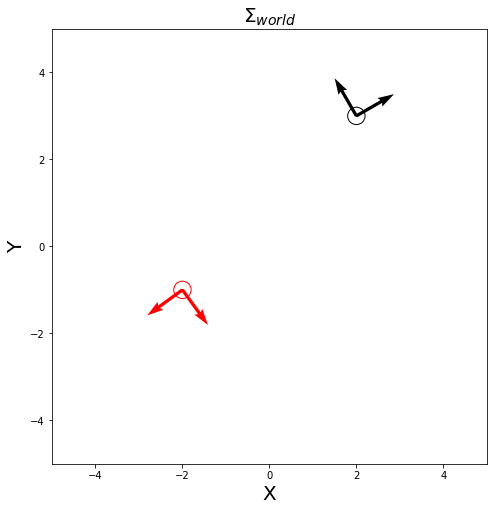

In [4]:
world = World()            ### fig:execution_robot_class
# world.draw()         # これは削除
### 以下追加 ###
robot1 = IdealRobot( np.array([2, 3, math.pi/6]).T )           # ロボットのインスタンス生成（色を省略）
robot2 = IdealRobot( np.array([-2, -1, math.pi/5*6]).T, "red")  # ロボットのインスタンス生成（色を指定）
world.append(robot1)                                      # ロボットを登録 
world.append(robot2)
world.draw()